In [260]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import GETFF

In [261]:
def PSM_theory(x):
    numerator = (0.4133 * x - 0.1038 * x**2 + 0.01252 * x**3 + 0.007748 * x**4)
    denominator = (1 + 0.9771 * x - 0.3506 * x**2 + 0.09863 * x**3 + 0.009927 * x**4 + 0.000002173 * x**5)
    return numerator / denominator
x=np.linspace(0,10,1000)
y=np.zeros(len(x))
for i in range(0,len(x)):
    y[i]=PSM_theory(x[i])

In [262]:
muN=1.9103
#muN=1
pas="1"
#2
GEGM2=np.sum(np.load(f'SavedArrays/GEN2/Pass{pas}/GEGM.npy'))
GEGM2E=np.sum(np.load(f'SavedArrays/GEN2/Pass{pas}/GEGME.npy'))
#3
GEGM3=np.sum(np.load(f'SavedArrays/GEN3/Pass{pas}/GEGM.npy'))
GEGM3E=np.sum(np.load(f'SavedArrays/GEN3/Pass{pas}/GEGME.npy'))
#4
GEGM4=np.sum(np.load(f'SavedArrays/GEN4/Pass{pas}/GEGM.npy'))
GEGM4E=np.sum(np.load(f'SavedArrays/GEN4/Pass{pas}/GEGME.npy'))

In [263]:
GEGM3


0.30332857930502527

In [264]:
muN*GEGM2

0.4838383376101552

In [265]:
muN*GEGM3

0.5794485850463899

In [266]:
muN*GEGM4

1.0526954238070259

In [267]:
GEN2Data = {
    'Q2': [3, 6.83, 9.82],
    'ExpName': ['GEn-II', 'GEn-II', 'GEn-II'],
    'R': [abs(muN*GEGM2), abs(muN*GEGM3), abs(muN*GEGM4)],
    'R_err': [abs(GEGM2E),abs(GEGM3E),abs(GEGM4E)],
    'GEn': [0.01, 0.02, 0.03],   # assuming GEn and GEn_err are present in the file
    'GEn_err': [0.001, 0.002, 0.003]
}

# CRYPTIC CODE___________________________

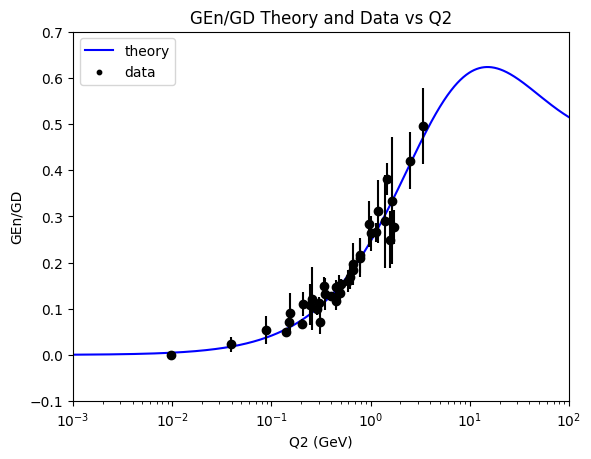

In [268]:
def Dipole(Q2):
    return (1+Q2/.71)**-2

GEndata = np.transpose(np.loadtxt('../DB/GLOBFIT17_gen_feb07.out'))
GEntheory = np.transpose(np.loadtxt('../DB/neutron_lookup.dat'))
Q2 = GEndata[0]
Q2t = GEntheory[0]
Q2t = np.sort(Q2t)
GEntrat=GEntheory[1]
GEn = GEndata[1]
GEnerr = GEndata[2]
rat = np.zeros(len(GEn))
raterr = np.zeros(len(GEnerr))
dipole = np.zeros(len(Q2))
for i in range(0,len(Q2)):
    dipole[i]=Dipole(Q2[i])
    


#plt.scatter(Q2,dipole,label='Dipole Form Factor')
#plt.title('Dipole Form Factor vs Q2 from GEn Data')
#plt.xlabel('Q2')
#plt.ylabel('GD')
for i in range(0,len(GEn)):
    rat[i]=GEn[i]/dipole[i]
    raterr[i]=GEnerr[i]/dipole[i]
plt.plot(Q2t,GEntrat,color='blue',label='theory')
plt.xlim((10**(-3),10**2))
plt.ylim((-.1,.7))
plt.xscale('log')
plt.title("GEn/GD Theory and Data vs Q2")
plt.xlabel('Q2 (GeV)')
plt.ylabel('GEn/GD')
plt.scatter(Q2,rat,color='black',s=10, label='data')
plt.errorbar(Q2,rat,yerr=raterr,color='black',fmt='o')
plt.legend(loc='upper left')

#  End CRYPTIC CODE____________________________

# arrington 2017 fit

In [269]:
GETFF.Function_GETFF(3,Q2t[i])[0]

7.607134041487788e-07

In [270]:
GEGD=np.empty(0)
GEGDE=np.empty(0)

GMGD=np.empty(0)
GMGDE=np.empty(0)

for i in range(0,len(Q2t)):
    GEGD=np.append(GEGD,GETFF.Function_GETFF(3,Q2t[i])[0])
    GEGDE=np.append(GEGDE,GETFF.Function_GETFF(3,Q2t[i])[1])
    GMGD=np.append(GMGD,GETFF.Function_GETFF(4,Q2t[i])[0])
    GMGDE=np.append(GMGDE,GETFF.Function_GETFF(4,Q2t[i])[1])

In [271]:
len(GEGDE)

2000

In [272]:
#Error Prop

def eprop(GE, GEE, GM, GMM):
    R = GE / GM
    relative_error_GE = GEE / GE
    relative_error_GM = GMM / GM
    fractional_uncertainty_R = np.sqrt(relative_error_GE**2 + relative_error_GM**2)
    delta_R = R * fractional_uncertainty_R
    return R, delta_R

In [273]:
RatFit,RatFitE=eprop(GEGD,GEGDE,GMGD,GMGDE)

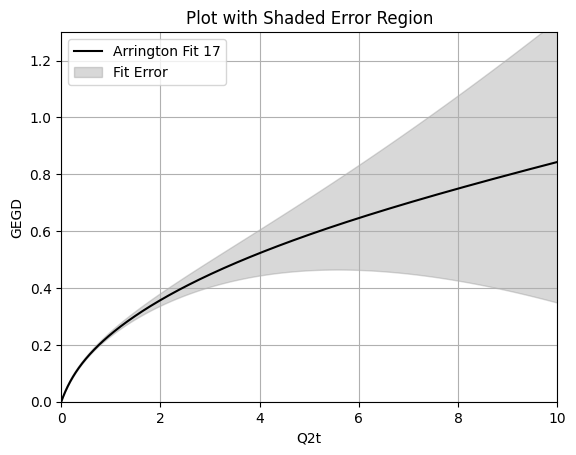

In [274]:
plt.figure()
plt.plot(Q2t, RatFit, color='black',label='Arrington Fit 17')  # Plot the main line


# Calculate the upper and lower bounds of the shaded area
upper_bound = RatFit+RatFitE
lower_bound = RatFit-RatFitE

# Add shaded region
plt.fill_between(Q2t, lower_bound, upper_bound, color='gray', alpha=0.3,label='Fit Error')

# Set other plot properties
#plt.xscale('log')
plt.xlabel('Q2t')
plt.ylabel('GEGD')
plt.title('Plot with Shaded Error Region')
plt.grid(True)
plt.legend(loc='upper left')
plt.xlim(0,10)
plt.ylim(0,1.3)
plt.show()

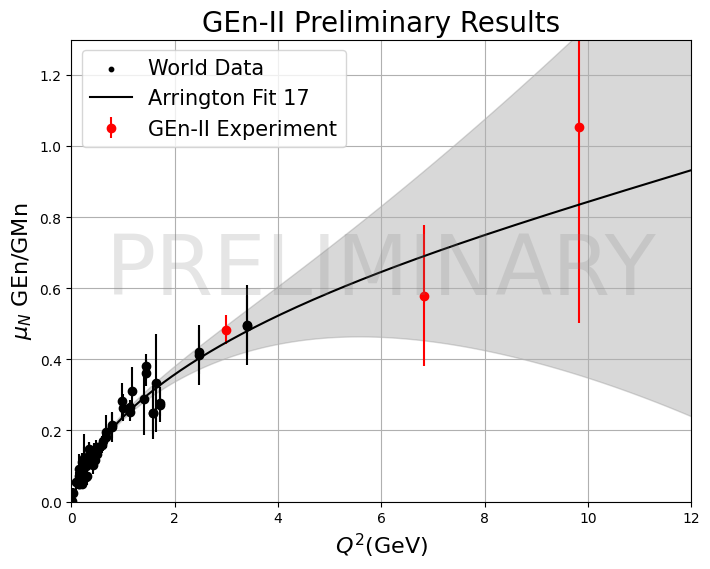

In [275]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../DB/worlddat.dat'
data = pd.read_csv(file_path)

additional_data_df = pd.DataFrame(GEN2Data)
data = pd.concat([data, additional_data_df], ignore_index=True)
fig, ax = plt.subplots(figsize=(8, 6))

groups = data.groupby('ExpName')
colors=['red','black','black','black','black']
labels=['GEn-II Experiment','','','','']
for color, labels, (name, group) in zip(colors,labels, groups):
    ax.errorbar(group['Q2'], group['R'], yerr=group['R_err'], fmt='o', color= color,label=labels)


#ax.set_title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $Q^2$',fontsize='20')
#plt.plot(x,y,'--',label="PSM",color='red')
#plt.plot(Q2t,GEntrat,color='blue',label='global fit')
plt.scatter(Q2,rat,color='black',s=10, label='World Data')
plt.errorbar(Q2,rat,yerr=raterr,color='black',fmt='o')
ax.legend(loc='upper left')
plt.ylim(0,1.3)
plt.xlim(0,12)
#plt.xlim((10**(-3),10**2))
#plt.ylim((-.1,.6))
#plt.xscale('log')

#Fit---------------------------------
plt.plot(Q2t, RatFit, color='black',label='Arrington Fit 17')  # Plot the main line
upperRatFit = RatFit+RatFitE
lowerRatFit = RatFit-RatFitE
plt.fill_between(Q2t, upperRatFit, lowerRatFit, color='gray', alpha=0.3)
plt.grid(True)
plt.legend(loc='upper left',fontsize=15)

#Watermark---------------------------------------
plt.text(0.5, 0.5, 'PRELIMINARY', fontsize=60, color='gray', ha='center', va='center',
         alpha=0.2, transform=plt.gca().transAxes)
plt.xlabel('$Q^2$(GeV)',fontsize=16)
plt.ylabel('$\mu_N$ GEn/GMn',fontsize=16)
plt.title('GEn-II Preliminary Results',fontsize=20)
plt.xlim(0,12)
plt.ylim(0,1.3)
plt.show()
